<a href="https://colab.research.google.com/github/Swayamprakashpatel/DE_Interact.github.io/blob/main/DE_Interact_Stratified%20K%20Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT DESCRIPTION**

Determination of compatibility between drug and excipient is crucial step during any pharmaceutical formulation development. Presently only experiment based techniques are available to determine proabable incompatibility. 

This project is about development of artificial neural network (ANN) based model for prediction of incompatibility. This will save significant time and dependancy over costly tests like DSC and FTIR. This formal prediction allows formulators to choose excipient wisely. 

**DRUG EXCIPIENT INTERACTION PREDICTION BY ARTIFICIAL NEURAL NETWORK**

Accuracy of Training Data: 0.9834

Accuracy of Validating Data: 0.9096

Total Data: 1035

Developed by:
**Dr Swayamprakash Patel**

Asst. Professor

Ramanbhai Patel College of Pharmacy

Charotar University of Science and Technolgoy (CHARUSAT)

CONTACT: swayamprakash.patel@gmail.com 

**PLEASE SEND YOUR SUGGESTION THROUGH BELOW LINK**

https://forms.gle/9f6s2i4B2iBUYWCE9


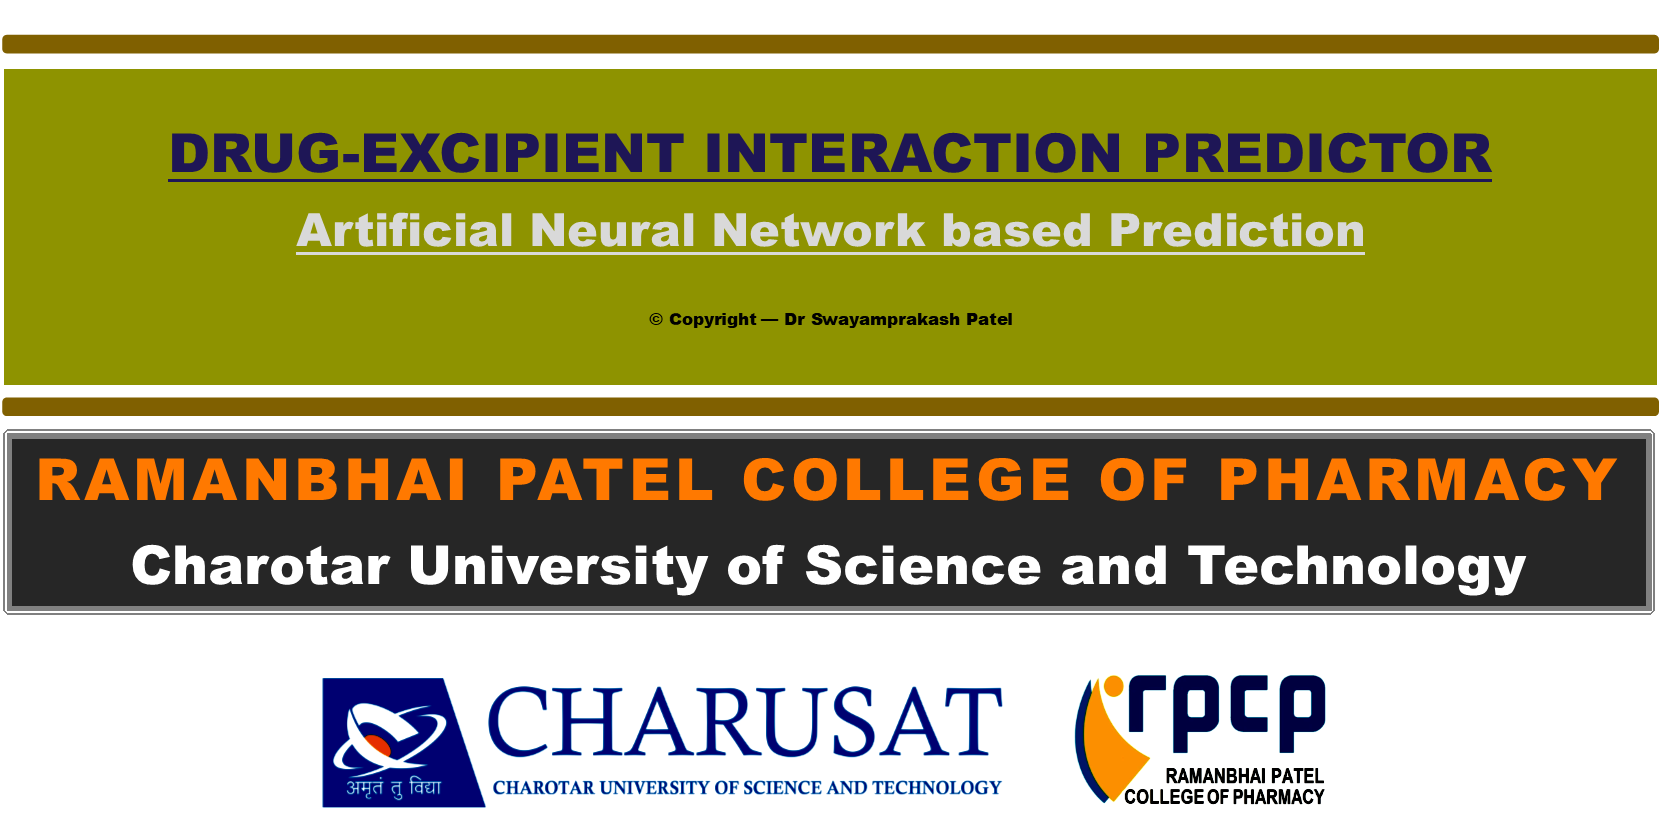

In [ ]:
#@title **INSERT PUBCHEM CID OF DRUG AND EXCIPIENT** *Run Code and wait to finish process*
#%%capture

import tensorflow as tf
#import tensorflowjs as tfjs
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = 'https://github.com/Swayamprakashpatel/DETensorflow/blob/main/DEL.csv?raw=true'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('Drugs', axis = 1, inplace = True)
df.drop('Excipients', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
df.columns[df.isna().any()].tolist()
dataset = df.values
X = dataset[:,0:1762]
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y1 = dataset[:,1762:1763] 
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = np.array(LE.fit_transform(Y1))

from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
#X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10 , shuffle=True)
for train, val in skf.split(X, Y):

  filepath = '/content/drive/MyDrive/Model_DE/Model.hdf5'
 
  checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, verbose =1), [tensorboard_callback]]

  model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1024, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.BinaryCrossentropy(from_logits = False), metrics=['accuracy'])
  hist = model.fit(X[train].astype(np.int64), Y[train].astype(np.int64), epochs= 2000, callbacks=[checkpoint],validation_data=(X[val].astype(np.int64), Y[val].astype(np.int64)), batch_size= 400)
 
Y_train_predict = np.round(model.predict(X_train))
Y_train_l = tf.argmax(Y_train, axis = 1)
Y_train_predict_l = tf.argmax(Y_train_predict, axis =1)
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(Y_train_l, Y_train_predict_l)
print(cm)
print( skm.classification_report(Y_train_l, Y_train_predict_l))
 
train_acc = max(hist.history['accuracy'])
val_acc = max(hist.history['val_accuracy'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training Accuracy is')
print(train_acc)
print('Validation Accuracy is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)
 
# Error Graph
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()
#plt.figure(figsize=(5,5), dpi=300)
#plt.gcf()
plt.savefig('Loss.svg', DPI = 3500, Transperent = True)
 
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('Model accuracy')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
#plt.show()
#plt.figure(figsize=(5,5), dpi=300)
#plt.gcf()
plt.savefig('Precision.svg', DPI = 3500, Transperent = True)
 
#@title Insert PubChem Fingerprint of Drug and Excipient
!pip install pubchempy
import pubchempy as pcp
Drug_CID =  3878#@param {type:"number"}
Excipient_CID =  104938#@param {type:"number"}


CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint 

#from base64 import b64decode
 
#def PCFP_BitString(pcfp_base64) :
 
    #pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    #return pcfp_bitstring
 
# *****copy paste PUBCHEM_CACTVS_SUBSKEYS*********
# DRUG#
#Chem1 = 'AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAAAAAAAAAAAA=='
 
#EXCIPIENT#
#Chem2 = 'AAADceBwPAAAAAAAAAAAAAAAAAAAAAAAAAAkSAAAAAAAAAAAAAAAGgAACAAACBSwgAMACAAABgAAAAAAAAAAAAAAAAAAAAAAAAAREAIAAAAiQAAFAAAHAAHAYAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=='
 
#**************************************************
 
# Do not edit below codes
#Pubchem_Fingerprint_of_Drug = "" #@param {type:"string"}
#Pubchem_Fingerprint_of_Excipient = "" #@param {type:"string"}

 
#print(PCFP_BitString(Pubchem_Fingerprint_of_Drug))
#print(PCFP_BitString(Pubchem_Fingerprint_of_Excipient))
#dfChem1 = (PCFP_BitString(Pubchem_Fingerprint_of_Drug))
 
#dfChem1 = (PCFP_BitString(Pubchem_Fingerprint_of_Drug))
#dfChem2 = (PCFP_BitString(Pubchem_Fingerprint_of_Excipient))

#********************************************************
List1 = list(FPD)
List2 = list(FPE)
List = List1 + List2
 
import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))
 
#@title RUN FOR PREDICTION
 
 
dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1762].astype(int))
print(X_Predict)
print(X_Predict.shape)
print(X_Predict.dtype)
 
t1 = model.predict(X_Predict)
print(t1)
 
t = np.round(model.predict(X_Predict))
print(t)
 
Y_prediction = enc.inverse_transform(t)
print(Y_prediction, Y_prediction.shape)

%load_ext tensorboard
%tensorboard --logdir logs

In [21]:
import tensorflow as tf
#import tensorflowjs as tfjs
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = 'https://github.com/Swayamprakashpatel/DETensorflow/blob/main/DEL.csv?raw=true'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('Drugs', axis = 1, inplace = True)
df.drop('Excipients', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
df.columns[df.isna().any()].tolist()
dataset = df.values
X = dataset[:,0:1762]
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y1 = dataset[:,1762:1763] 
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = np.array(LE.fit_transform(Y1))

from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
#X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10 , shuffle=True)
for train, val in skf.split(X, Y):

  filepath = '/content/drive/MyDrive/Model_DE/Model.hdf5'
 
  checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, verbose =1), [tensorboard_callback]]

  model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1024, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.BinaryCrossentropy(from_logits = False), metrics=['accuracy'])
  hist = model.fit(X[train].astype(np.int64), Y[train].astype(np.int64), epochs= 2000, callbacks=[checkpoint],validation_data=(X[val].astype(np.int64), Y[val].astype(np.int64)), batch_size= 400)

(4248, 1763)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/2000
10/10 [==============================] - ETA: 0s - loss: 1.0332 - accuracy: 0.1645
Epoch 00001: val_accuracy improved from -inf to 0.16471, saving model to /content/drive/MyDrive/Model_DE/Model.hdf5
10/10 [==============================] - 3s 277ms/step - loss: 1.0332 - accuracy: 0.1645 - val_loss: 0.3218 - val_accuracy: 0.1647
Epoch 2/2000
10/10 [==============================] - ETA: 0s - loss: 0.3155 - accuracy: 0.1645
Epoch 00002: val_accuracy did not improve from 0.16471
10/10 [==============================] - 3s 259ms/step - loss: 0.3155 - accuracy: 0.1645 - val_loss: 0.2570 - val_accuracy: 0.1647
Epoch 3/2000
10/10 [==============================] - ETA: 0s - loss: 0.3007 - accuracy: 0.1645
Epoch 00003: val_accuracy did not improve from 0.16471
10/10 [==============================] - 2s 255ms/step - loss: 0.3007 - accuracy: 0.1645 - val_loss: 0.2498 - val_accuracy: 0.1647
Epoch 4/2000
10/10 [==============================] - ETA: 0s - loss: 0.2179 - accuracy: 0.16

KeyboardInterrupt: ignored

In [ ]:
#@title **SHOW RESULT** *Once above code executed then run this code to get result*

print(Y_prediction)